In [10]:
import tensorflow as tf
import sys
sys.path.append("../")
from federated.models.mitbih_model import create_cnn_model, create_dense_model
from federated.utils.mitbih_data_preprocessing import get_centralized_datasets
from sklearn.metrics import confusion_matrix
import numpy as np

In [11]:
import nest_asyncio
nest_asyncio.apply()

## Loading model and test dataset

In [12]:
model = tf.keras.models.load_model("../history/logdir/dense")
_, test_dataset = get_centralized_datasets(data_analysis=True) 


## Evaluating Model

In [13]:
scores = model.evaluate(test_dataset, verbose=0)
print(f"Accuracy: {scores[1]*100}%, Loss: {scores[0]}")

Accuracy: 97.64732718467712%, Loss: 0.13074234127998352


In [14]:
get_datapoints = lambda x, y : x

In [15]:
test_dataset_datapoints = test_dataset.map(get_datapoints)
y_true = np.array([label.numpy() for _, label in iter(test_dataset.unbatch())])
y_pred = model.predict(test_dataset_datapoints)

In [16]:
y_true = np.argmax(y_true, axis=1)
y_pred = np.argmax(y_pred, axis=1)

<AxesSubplot:>

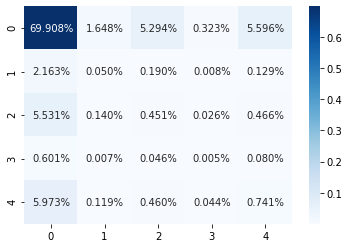

In [20]:
import seaborn as sns
ann_model_cf_matrix = confusion_matrix(y_true, y_pred)
sns.heatmap(ann_model_cf_matrix/np.sum(ann_model_cf_matrix), annot=True,fmt='.3%', cmap='Blues')